# K-nearest neighbors algorithm on Iris dataset

In [29]:
from IPython.display import Image
import numpy as np

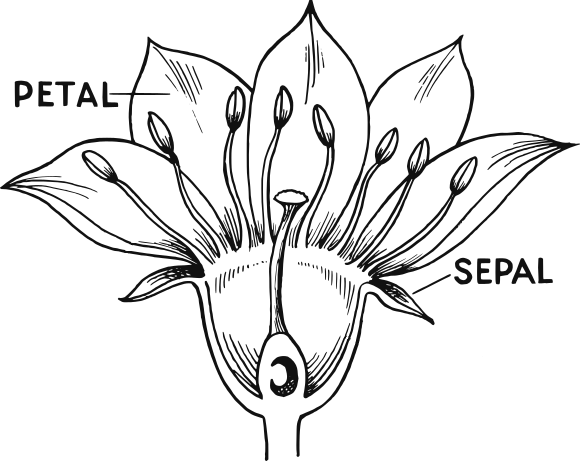

In [18]:
Image("petal_sepal.png")

### Data

In [3]:
# load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
print(iris.data.shape, iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

(150, 4) (150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


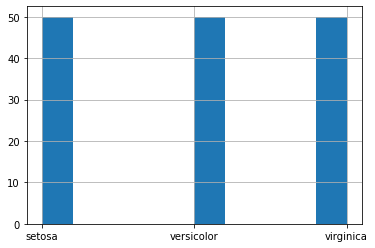

In [8]:
# plot group distribution
import pandas as pd
import matplotlib.pyplot as plt
target_str = pd.Series(iris.target).apply(lambda i: iris.target_names[i])
ax = target_str.hist()

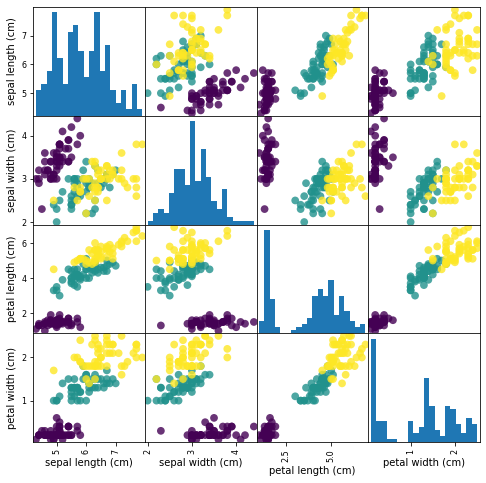

In [11]:
# iris as data frame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# create a scatter matrix from the dataframe, color by target
ax = pd.plotting.scatter_matrix(iris_df, c=iris.target, marker='o', figsize=(8,8), hist_kwds={'bins': 20}, s=60, alpha=.8)


### Train-test split

In [37]:
# train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.3, random_state=13)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105,)
(45, 4) (45,)


### kNN model

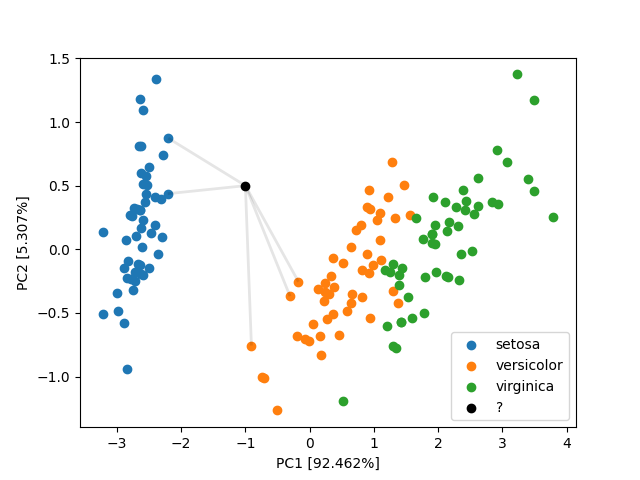

In [38]:
Image("knn_points.png")

### Train the model 

In [39]:
# create a knn, k = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
# fit to the train set
knn.fit(xtrain, ytrain);

### Predict

In [41]:
ytrain_pred = knn.predict(xtrain)
ytest_pred = knn.predict(xtest) 

### Evaluation

In [42]:
# accuracy
acc_train = (ytrain == ytrain_pred).mean()
acc_test = (ytest == ytest_pred).mean()
print(f"Train set: {acc_train}")
print(f"Test set: {acc_test}")

Train set: 0.9714285714285714
Test set: 0.9111111111111111


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print(f"Train set: {accuracy_score(ytrain, ytrain_pred)}")
print(f"Test set: {accuracy_score(ytest, ytest_pred)}")

Train set: 0.9714285714285714
Test set: 0.9111111111111111


In [45]:
# confusion matrix for train set
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cM_train = confusion_matrix(ytrain, ytrain_pred)
cM_train

array([[36,  0,  0],
       [ 0, 37,  1],
       [ 0,  2, 29]])

In [46]:
# train set accuracy from confusion matrix
np.diag(cM_train).sum() / cM_train.sum()

0.9714285714285714

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


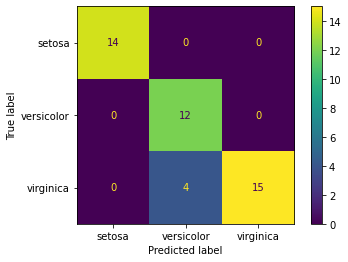

In [47]:
# plot test set confusion matrix as heatmap
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn, xtest, ytest, display_labels=iris.target_names);

### Hyperparameter tuning 

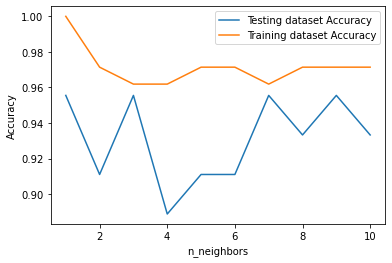

In [50]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(xtrain, ytrain)
    test_accuracy[i] = knn.score(xtest, ytest)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# tune hyperparameter k
from sklearn.model_selection import GridSearchCV
parameters = dict(n_neighbors=list(range(1,10)))
clf = GridSearchCV(knn, parameters)
# run
search = clf.fit(xtrain, ytrain)
search.best_params_['n_neighbors']

5